In [18]:
#Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [19]:
#Database load
data_cust = pd.read_csv("datasets/olist_customers_dataset.csv")
data_order_item = pd.read_csv("datasets/olist_order_items_dataset.csv")
data_order_paym = pd.read_csv("datasets/olist_order_payments_dataset.csv")
data_order_review = pd.read_csv("datasets/olist_order_reviews_dataset.csv")
data_order_main = pd.read_csv("datasets/olist_orders_dataset.csv")
data_product = pd.read_csv("datasets/olist_products_dataset.csv")
data_sellers = pd.read_csv("datasets/olist_sellers_dataset.csv")
data_product_cate_name = pd.read_csv("datasets/product_category_name_translation.csv")

In [20]:
#Different databases merge
compiled_df = data_cust.merge(data_order_main, how='inner', on='customer_id')
compiled_df = compiled_df.merge(data_order_review, how='inner', on='order_id')
compiled_df = compiled_df.merge(data_order_paym, how='inner', on='order_id')
compiled_df = compiled_df.merge(data_order_item, how='inner', on='order_id')
compiled_df = compiled_df.merge(data_product, how='inner', on='product_id')
compiled_df = compiled_df.merge(data_sellers, how='inner', on='seller_id')
compiled_df = compiled_df.merge(data_product_cate_name, how='inner', on='product_category_name')

In [21]:
# converting to datetime
compiled_df['order_estimated_delivery_date'] = pd.to_datetime(compiled_df.order_estimated_delivery_date).dt.date  
compiled_df['order_delivered_customer_date'] = pd.to_datetime(compiled_df.order_delivered_customer_date).dt.date  

# Drop columns
df1 = compiled_df[['customer_state', 'order_status', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score', 'seller_id', 'price', 'product_category_name_english']]
#Quit every instance that is not 'delivered'
df1 = df1[df1.order_status == 'delivered']
df1 = df1.drop(['order_status'], axis = 1)
#Remove rows with null dates
df1 = df1.dropna()

#Substraction
df1['delivery_delay'] = df1['order_estimated_delivery_date']-df1['order_delivered_customer_date']
df1['delivery_delay'] = df1['delivery_delay'].dt.days
df1 = df1.drop(['order_delivered_customer_date'], axis = 1)
df1 = df1.drop(['order_estimated_delivery_date'], axis = 1)

In [22]:
df2 = df1.copy()

In [23]:
df2

,customer_state,review_score,seller_id,price,product_category_name_english,delivery_delay
0,SP,4,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,11
1,PA,1,7c67e1448b00f6e969d365cea6b010ab,112.99,office_furniture,21
2,PA,1,7c67e1448b00f6e969d365cea6b010ab,112.99,office_furniture,21
3,RS,3,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,17
4,RJ,4,7c67e1448b00f6e969d365cea6b010ab,106.99,office_furniture,22
...,...,...,...,...,...,...
115604,SC,4,c731d18cea9bf687ffee82a241c25b11,389.00,la_cuisine,12
115605,SP,1,c731d18cea9bf687ffee82a241c25b11,24.00,la_cuisine,16
115606,SP,5,c731d18cea9bf687ffee82a241c25b11,139.00,la_cuisine,14
115607,MG,5,c731d18cea9bf687ffee82a241c25b11,129.00,la_cuisine,19


In [24]:
# Change string values to numbers
le = preprocessing.LabelEncoder()
le.fit(df2['customer_state'])
df2['customer_state'] = le.transform(df2['customer_state'])

le.fit(df2['seller_id'])
df2['seller_id'] = le.transform(df2['seller_id'])

le.fit(df2['product_category_name_english'])
df2['product_category_name_english'] = le.transform(df2['product_category_name_english'])


In [8]:
df2

,customer_state,review_score,seller_id,price,product_category_name_english,delivery_delay
0,25,4,1448,124.99,57,11
1,13,1,1448,112.99,57,21
2,13,1,1448,112.99,57,21
3,22,3,1448,124.99,57,17
4,18,4,1448,106.99,57,22
...,...,...,...,...,...,...
115604,23,4,2267,389.00,52,12
115605,25,1,2267,24.00,52,16
115606,25,5,2267,139.00,52,14
115607,10,5,2267,129.00,52,19


In [25]:
#Spliting train and test instances

x = df2.drop('review_score', axis=1)
y = df2['review_score']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [26]:
#Scaling the training set

sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [27]:
#Create regressor
from sklearn.neural_network import MLPRegressor
mlp_reg1 = MLPRegressor(hidden_layer_sizes=(20,12,10),
                       max_iter = 100,activation = 'relu',
                       solver = 'adam')


In [28]:
#Apply regressor to our sets
mlp_reg1.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(20, 12, 10), max_iter=100)

In [29]:
#Compare predictions and actual values
y_pred = mlp_reg1.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp

,Actual,Predicted
115594,5,4.184001
2442,1,4.092967
28173,5,4.264670
58414,5,4.147892
14268,5,4.084518
...,...,...
3453,5,4.222656
28397,5,4.146489
84328,4,4.092008
104244,5,4.010432


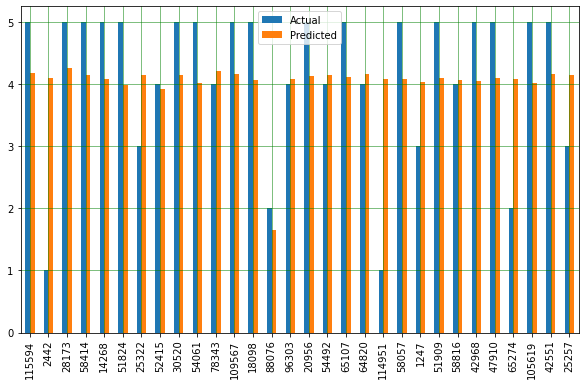

In [30]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [31]:
#Get RMSE
MSE = mean_squared_error(testY, y_pred)
 
RMSE = np.sqrt(MSE)
RMSE

1.239383104312221

In [32]:
#4.09 is the mean of the reviews
y_pred2 = [4.09]*22641
df_temp1 = pd.DataFrame({'Actual': testY, 'Predicted': y_pred2})
df_temp1

,Actual,Predicted
115594,5,4.09
2442,1,4.09
28173,5,4.09
58414,5,4.09
14268,5,4.09
...,...,...
3453,5,4.09
28397,5,4.09
84328,4,4.09
104244,5,4.09


In [33]:
MSE = mean_squared_error(testY, y_pred2)
 
RMSE = np.sqrt(MSE)
RMSE

1.338264017600688